<a href="https://colab.research.google.com/github/Adityan1512/Coursework-Codes/blob/main/AI_ML_GroupWork_GROUP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI & ML IN FINANCE SERVICES GROUP COURSEWORK- GROUP 1 [ Adityan.(w1977985) ; Prerna (w2005053) ; Laura(w1801578) ; Hashmi(w1982974) ]

---



---



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, classification_report, auc
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
pd.options.mode.chained_assignment = None

Importing the Credit Rating (EM.csv) Dataset

In [ ]:
credit_rating_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EM.csv')

credit_rating_data.head(5)

,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.0,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.0,2582700.0,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.0,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.0,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.0,553800.0,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Credit Rating Data Descriptive Statistics

In [ ]:
# Display the first few rows of the dataset and a summary of the data
data_info = credit_rating_data.info()
data_head = credit_rating_data.head()
data_description = credit_rating_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Creditscore                      8176 non-null   int64  
 1   Creditscoreindicator             8176 non-null   object 
 2   Likelihoodoffailure              8107 non-null   float64
 3   CreditlimitGBPGBP                6771 non-null   float64
 4   Previouscreditscore              7740 non-null   float64
 5   SMEindicator                     8176 non-null   object 
 6   ReturnonTotalAssets2020          2981 non-null   float64
 7   ReturnonTotalAssets2019          6773 non-null   float64
 8   ReturnonShareholdersFunds2020    2443 non-null   float64
 9   ReturnonShareholdersFunds2019    5456 non-null   float64
 10  ReturnonCapitalEmployed2020      2913 non-null   float64
 11  ReturnonCapitalEmployed2019      6601 non-null   float64
 12  TurnoverthGBP2020   

In [ ]:
(data_info, data_head, data_description)

(None,
    Creditscore Creditscoreindicator  Likelihoodoffailure  CreditlimitGBPGBP  \
 0           92               Secure                  0.9         50000000.0   
 1           92               Secure                  0.9         50000000.0   
 2           95               Secure                  0.9         16574000.0   
 3           89               Secure                  0.9          5380000.0   
 4           99               Secure                  0.9         50000000.0   
 
    Previouscreditscore SMEindicator  ReturnonTotalAssets2020  \
 0                 95.0           No                      NaN   
 1                 99.0           No                -0.130484   
 2                 99.0           No                      NaN   
 3                 92.0           No                      NaN   
 4                 99.0           No                21.144665   
 
    ReturnonTotalAssets2019  ReturnonShareholdersFunds2020  \
 0                 5.614489                            Na

Defining the Analyzed Features

In [ ]:
features = ['Creditscore', 'Likelihoodoffailure']

In [ ]:
statistics = credit_rating_data[features].describe()
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
       Creditscore  Likelihoodoffailure
count  8176.000000          8107.000000
mean     57.300514             5.222030
std      29.730987             4.402007
min      15.000000             0.900000
25%      29.000000             0.900000
50%      45.000000             4.500000
75%      90.000000            10.600000
max      99.000000            19.400000


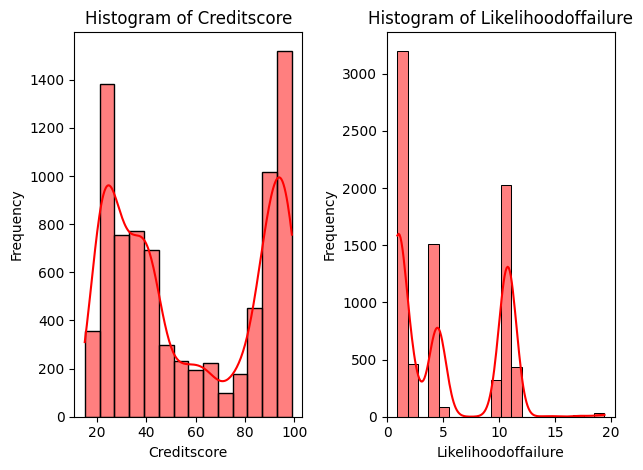

In [ ]:
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(credit_rating_data[feature], kde=True, color='red')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

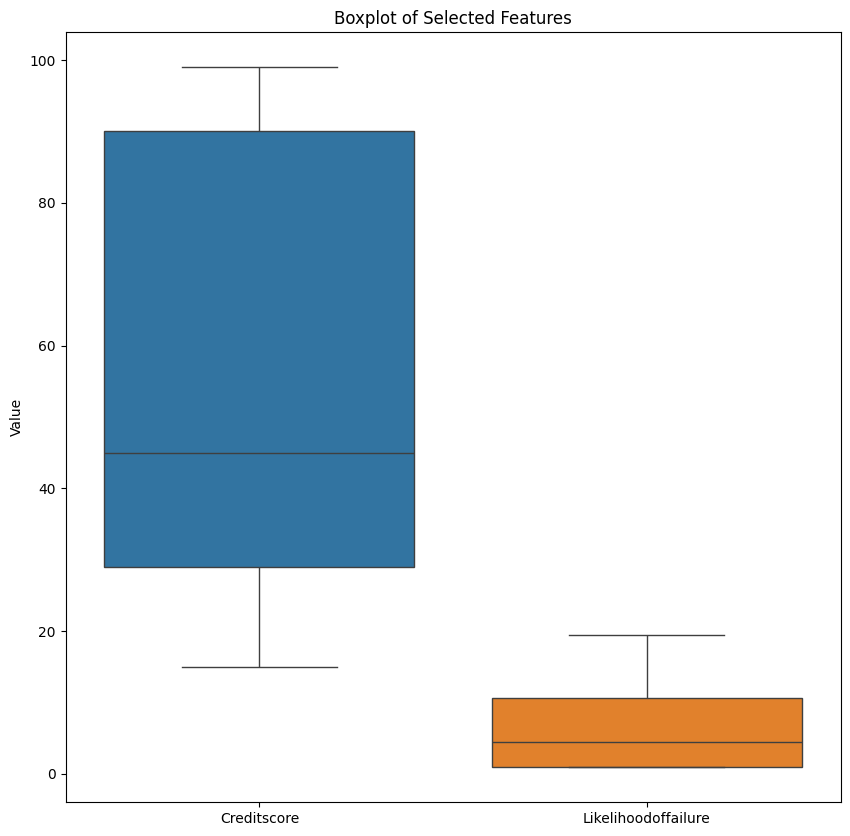

In [ ]:
# Plotting boxplots for each selected feature to identify outliers
plt.figure(figsize=(10, 10))
sns.boxplot(data=credit_rating_data[features])
plt.title('Boxplot of Selected Features')
plt.ylabel('Value')
plt.show()

Data Cleansing & Wrangling

In [ ]:
#Keeping only numerical data
credit_rating_data = credit_rating_data[list(credit_rating_data.select_dtypes('number'))]

#Reducing the number of features
credit_rating_data = credit_rating_data[['TotalAssetsthGBP2020','TotalAssetsthGBP2019','LongTermDebtthGBP2020','LongTermDebtthGBP2019','Likelihoodoffailure', 'Previouscreditscore', 'NetCurrentAssets2020', 'NetCurrentAssets2019', 'LiquidityRatiox2020', 'LiquidityRatiox2019', 'SolvencyratioLiabilitybased2020', 'SolvencyratioLiabilitybased2019', 'ShortTermLoansOverdrafts2020', 'ShortTermLoansOverdrafts2019', 'Creditscore']]

#Filling in mean of the feature where there are missing values
for x in credit_rating_data.columns:
  credit_rating_data[x].fillna(credit_rating_data[x].mean(), inplace = True)


Exploratory Data Analysis (EDA)

In [ ]:
credit_rating_data.describe()

,TotalAssetsthGBP2020,TotalAssetsthGBP2019,LongTermDebtthGBP2020,LongTermDebtthGBP2019,Likelihoodoffailure,Previouscreditscore,NetCurrentAssets2020,NetCurrentAssets2019,LiquidityRatiox2020,LiquidityRatiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019,ShortTermLoansOverdrafts2020,ShortTermLoansOverdrafts2019,Creditscore
count,8.176000e+03,8.176000e+03,8.176000e+03,8.176000e+03,8176.00000,8176.000000,8.176000e+03,8.176000e+03,8176.000000,8.176000e+03,8176.000000,8176.000000,8.176000e+03,8.176000e+03,8176.000000
mean,2.255198e+04,2.911258e+04,-2.540590e+04,-1.734157e+04,5.22203,60.431912,6.295583e+03,5.118260e+03,3.913848,3.033012e+00,35.770585,36.916356,-8.591704e+03,-1.024868e+04,57.300514
std,1.605344e+05,2.055121e+05,4.555289e+04,5.133101e+04,4.38339,28.940405,7.443391e+04,7.811109e+04,5.801669,6.696290e+00,11.840367,17.545082,2.286258e+04,4.282464e+04,29.730987
min,1.000000e-03,1.000000e-03,-2.242400e+06,-1.879300e+06,0.90000,12.000000,-7.680960e+05,-7.294150e+05,0.000210,2.740000e-07,0.000089,0.000056,-1.362453e+06,-1.548900e+06,15.000000
25%,7.241925e+01,2.087300e+01,-2.540590e+04,-1.734157e+04,0.90000,31.000000,1.258300e+01,0.000000e+00,2.213991,7.961397e-01,35.770585,36.916356,-8.591704e+03,-1.024868e+04,29.000000
50%,2.255198e+04,1.548608e+03,-2.540590e+04,-1.734157e+04,4.50000,60.431912,6.295583e+03,3.166500e+01,3.913848,1.536274e+00,35.770585,36.916356,-8.591704e+03,-1.024868e+04,45.000000
75%,2.255198e+04,1.233827e+04,-2.540590e+04,-1.734157e+04,10.60000,92.000000,6.295583e+03,2.701314e+03,3.913848,3.033012e+00,35.770585,36.916356,-8.591704e+03,-8.181390e+02,90.000000
max,6.860800e+06,7.124900e+06,-2.000000e-03,-3.300000e-02,19.40000,99.000000,4.267900e+06,4.320000e+06,97.166667,9.959388e+01,100.000000,100.000000,-1.000000e-03,-1.000000e-03,99.000000


In [ ]:
credit_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TotalAssetsthGBP2020             8176 non-null   float64
 1   TotalAssetsthGBP2019             8176 non-null   float64
 2   LongTermDebtthGBP2020            8176 non-null   float64
 3   LongTermDebtthGBP2019            8176 non-null   float64
 4   Likelihoodoffailure              8176 non-null   float64
 5   Previouscreditscore              8176 non-null   float64
 6   NetCurrentAssets2020             8176 non-null   float64
 7   NetCurrentAssets2019             8176 non-null   float64
 8   LiquidityRatiox2020              8176 non-null   float64
 9   LiquidityRatiox2019              8176 non-null   float64
 10  SolvencyratioLiabilitybased2020  8176 non-null   float64
 11  SolvencyratioLiabilitybased2019  8176 non-null   float64
 12  ShortTermLoansOverdr

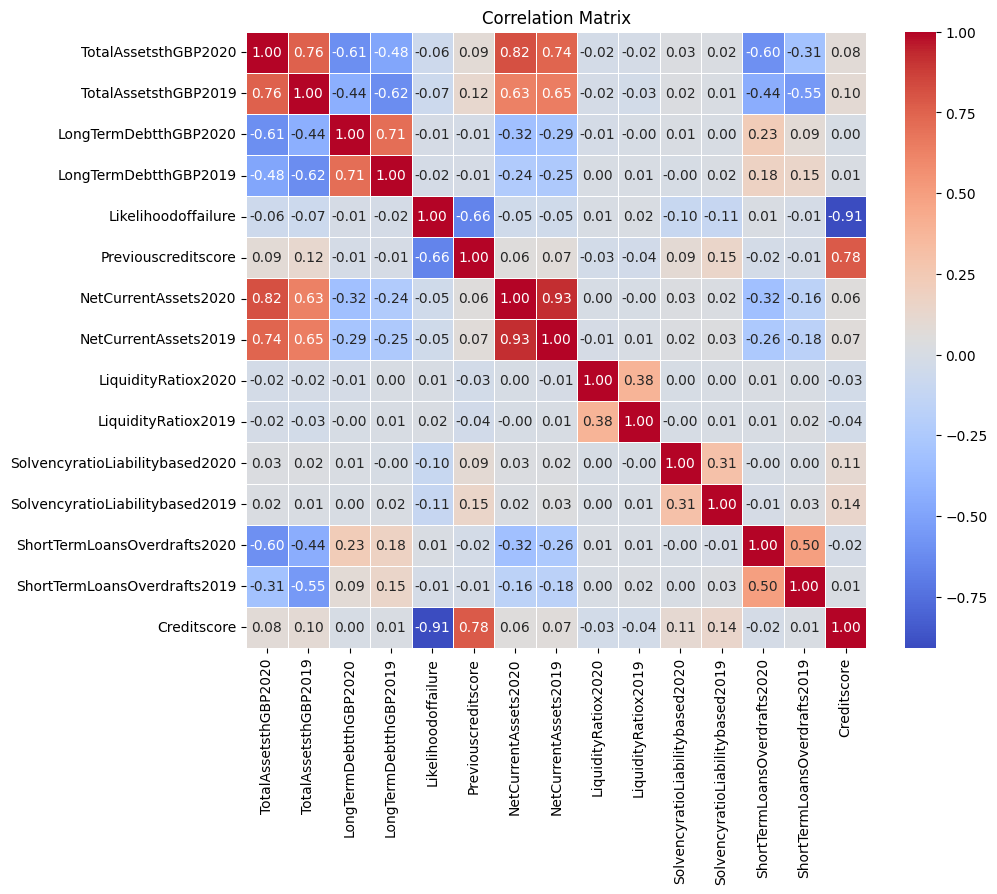

In [ ]:
corr_matrix = credit_rating_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Defining Target Variable

In [ ]:
credit_rating_data['credit_level'] = credit_rating_data.apply(lambda x: 1 if x['Creditscore'] > credit_rating_data['Creditscore'].mean() else 0, axis=1)

Clasification - Logistic Regression

In [ ]:
#Setting X & Y datasets i.e splitting data & result

X = credit_rating_data.loc[:, credit_rating_data.columns != 'credit_level']
Y = credit_rating_data.credit_level

In [ ]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle=False)

In [ ]:
#Ensuring all features/variables are in a comparable scales

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Defining Logistic Regression Model

modellr = LogisticRegression(random_state=123)

#training the model
modellr.fit(x_train, y_train)

#predicting the outcomes on out test set
y_pred = modellr.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2223
           1       0.96      0.98      0.97       230

    accuracy                           0.99      2453
   macro avg       0.98      0.99      0.98      2453
weighted avg       0.99      0.99      0.99      2453



Random Forest Classifier

In [ ]:
#model definition
modelrf = RandomForestClassifier(random_state=123)

#training the model
modelrf.fit(x_train, y_train)

#predicting outputs using the model
y_pred = modelrf.predict(x_test)
y_proba_rf = modelrf.predict_proba(x_test)[:,1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2223
           1       1.00      1.00      1.00       230

    accuracy                           1.00      2453
   macro avg       1.00      1.00      1.00      2453
weighted avg       1.00      1.00      1.00      2453



Cross Validation for Logistic regression

In [ ]:
accuracy_scores = cross_val_score(modellr, x_train, y_train, cv=5, scoring=make_scorer(accuracy_score))

print("Mean Accuracy: ", accuracy_scores.mean())
print("Standard Deviation: ", accuracy_scores.std())

Mean Accuracy:  0.9933610712431674
Standard Deviation:  0.00324846466055491


Cross Validation for Random Forest Classifier

In [ ]:
accuracy_scores = cross_val_score(modelrf, X, Y, cv=5, scoring=make_scorer(accuracy_score))

print("Mean Accuracy: ", accuracy_scores.mean())
print("Standard Deviation: ", accuracy_scores.std())

Mean Accuracy:  0.998776758409786
Standard Deviation:  0.002446483180428149


 Confusion Matrix

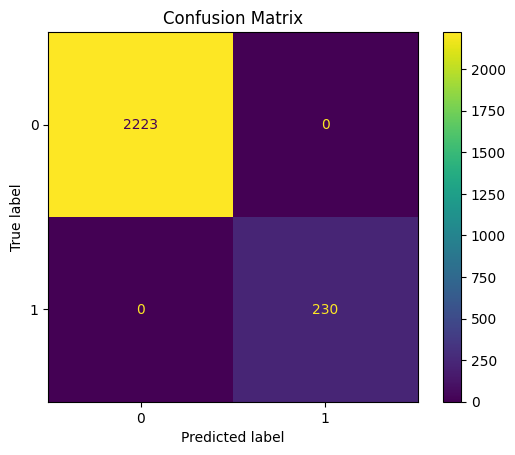

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay.from_estimator(modelrf, x_test, y_test)
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

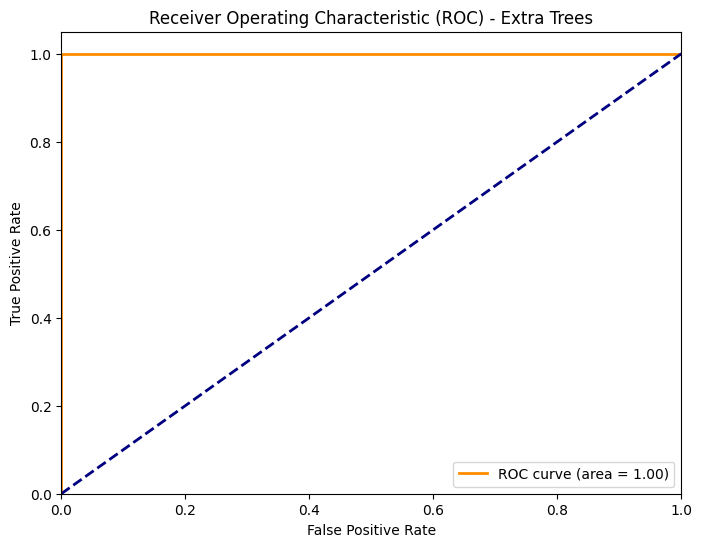

In [ ]:
#ROC curve

#log_disp = RocCurveDisplay.from_estimator(modelrf, x_test, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Extra Trees')
plt.legend(loc="lower right")
plt.show()

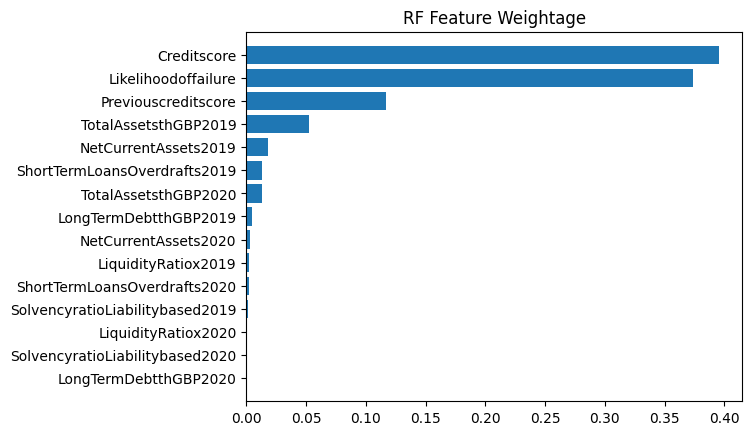

In [ ]:
#Weightage of features/variables for Random Forest Classifier

feature_name = X.columns
importance = modelrf.feature_importances_
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("RF Feature Weightage")
plt.barh(range1, importance[indices])
plt.yticks(range1, feature_name[indices])
plt.ylim([-1, len(range1)])
plt.show()